In [11]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

model = Sequential()

model.add(Conv2D(200, (3, 3), input_shape=(224, 224, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# New layer
model.add(Conv2D(75, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 classes for hand signs

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [14]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,mode='min')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
18/18 [==============================] - 90s 5s/step - loss: 1.5335 - accuracy: 0.4789 - val_loss: 0.4955 - val_accuracy: 0.8392
Epoch 2/20
18/18 [==============================] - 88s 5s/step - loss: 0.3388 - accuracy: 0.8820 - val_loss: 0.1868 - val_accuracy: 0.9091
Epoch 3/20
18/18 [==============================] - 89s 5s/step - loss: 0.1277 - accuracy: 0.9542 - val_loss: 0.1210 - val_accuracy: 0.9580
Epoch 4/20
18/18 [==============================] - 88s 5s/step - loss: 0.0236 - accuracy: 0.9947 - val_loss: 0.0988 - val_accuracy: 0.9650
Epoch 5/20
18/18 [==============================] - 88s 5s/step - loss: 0.0160 - accuracy: 0.9930 - val_loss: 0.0741 - val_accuracy: 0.9860
Epoch 6/20
18/18 [==============================] - 87s 5s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1298 - val_accuracy: 0.9650
Epoch 7/20
18/18 [==============================] - 89s 5s/step - loss: 3.8668e-04 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9720
Epoch 8/20
18/18

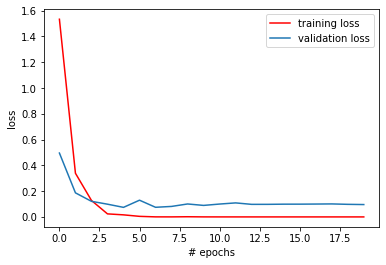

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

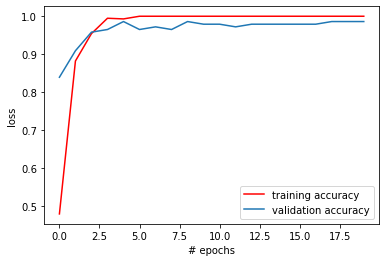

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_target)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

3/3 [==============================] - 3s 938ms/step - loss: 0.0016 - accuracy: 1.0000
Test loss: 0.0016254863003268838
Test accuracy: 1.0


In [18]:
predicted_probabilities = model.predict(test_data)
predicted_classes = np.argmax(predicted_probabilities, axis=-1)


3/3 [==============================] - 3s 935ms/step


In [19]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(test_target, axis=1), predicted_classes)

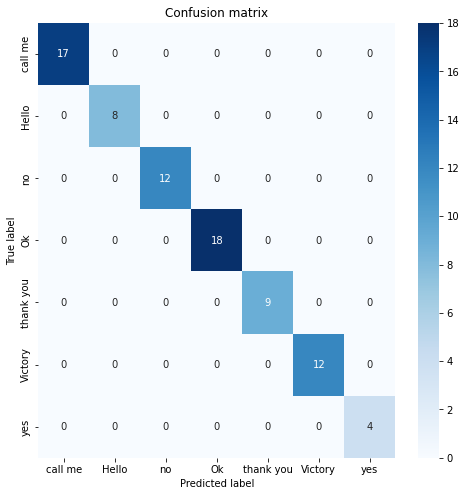

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = ['call me','Hello', 'no','Ok','thank you','Victory','yes']
cm = confusion_matrix(test_target.argmax(axis=1), predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
